In [85]:
#Dataset enriched with demographic data, changes made in excel sheet itself, columns labelled
#Reading data
import pandas as pd
import numpy as np

df = pd.read_excel("LAhousing.xlsx")

In [86]:
# Dropping columns not to be used for modelling
df.drop(['LandValue','LandBaseYear','ImprovementValue','ImpBaseYear','TotalLandImpValue','HomeownersExemption','RealEstateExemption','FixtureValue','FixtureExemption','PersonalPropertyValue','PersonalPropertyExemption','TotalExemption','netTaxableValue'],axis=1,inplace=True)

In [87]:
#Plotting Map of LA and locations of properties to see property distribution
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.CENTER_LON, df.CENTER_LAT))
gdf.drop(['CENTER_LAT','CENTER_LON'],axis=1,inplace=True)

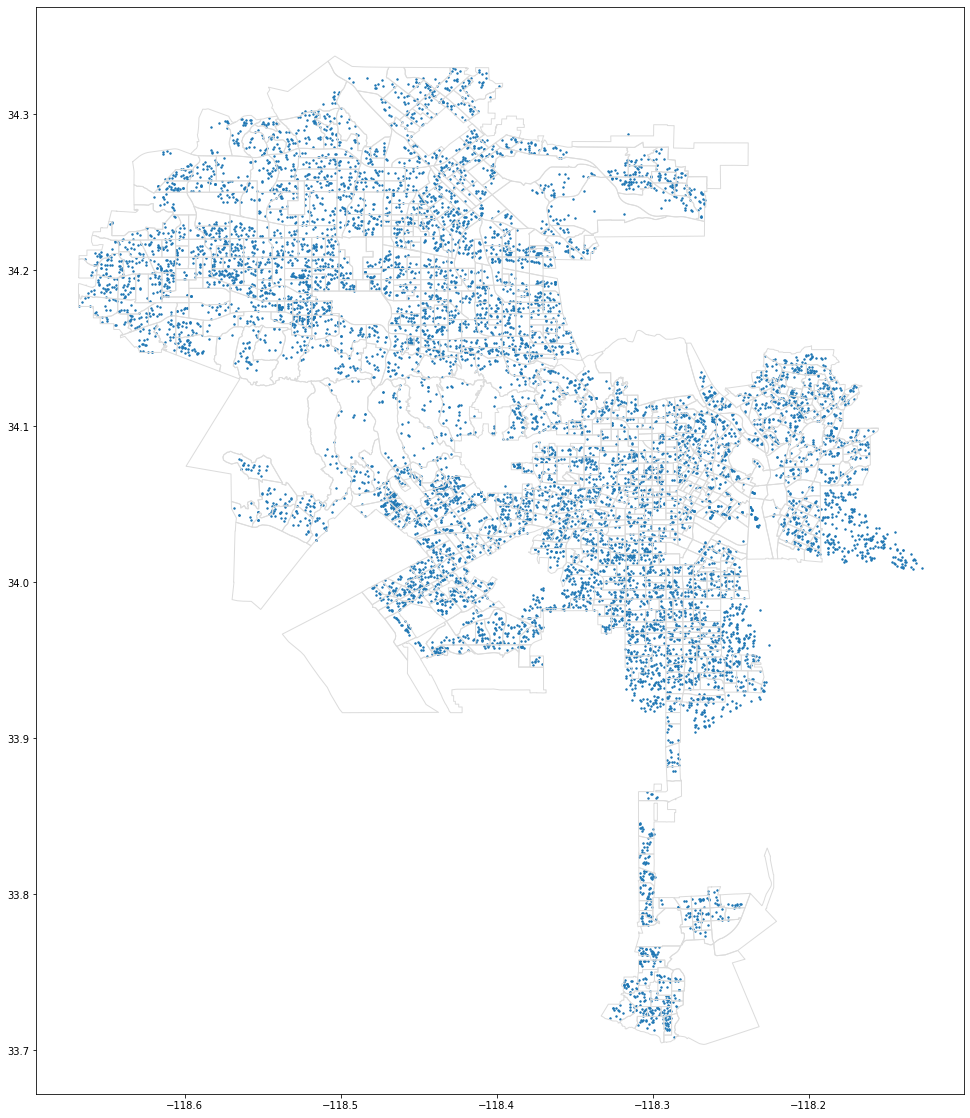

In [88]:
MAP = gpd.read_file("Census_Tracts_2010_Population.geojson")
ax = MAP.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
gdf.plot(figsize=(20,20),markersize=2,ax=ax)

In [89]:
# Checking for incomplete geodata
print(df.columns)
df[:][df['Total Population']==0]


Index(['ZIPcode', 'TaxRateArea_CITY', 'AIN', 'RollYear', 'TaxRateArea',
       'AssessorID', 'PropertyLocation', 'PropertyType', 'PropertyUseCode',
       'GeneralUseType', 'SpecificUseType', 'SpecificUseDetail1',
       'SpecificUseDetail2', 'totBuildingDataLines', 'YearBuilt',
       'EffectiveYearBuilt', 'SQFTmain', 'Bedrooms', 'Bathrooms', 'Units',
       'RecordingDate', 'isTaxableParcel?', 'TotalValue',
       'SpecialParcelClassification', 'AdministrativeRegion', 'Cluster',
       'ParcelBoundaryDescription', 'HouseNo', 'HouseFraction',
       'StreetDirection', 'StreetName', 'UnitNo', 'City', 'ZIPcode5', 'rowID',
       'CENTER_LAT', 'CENTER_LON', 'Location 1', 'Total Housing Units',
       'Total Population', 'Occupied Houses', 'Avg Household Size',
       'Avg Household Size(Occupied)', 'Avg Household Size(Rented)',
       'Total Household Size', 'Urban Housing', 'Population above 18',
       'Median Age', 'Urban Pop', 'geometry'],
      dtype='object')


ZIPcode TaxRateArea_CITY  ...  Urban Pop                     geometry
156   91606-5201      LOS ANGELES  ...          0  POINT (-118.36265 34.19128)
417        90013      LOS ANGELES  ...          3  POINT (-118.23721 34.04373)
678   90001-1433   unincorporated  ...          0  POINT (-118.24036 33.98500)
715   90044-5207      LOS ANGELES  ...          0  POINT (-118.28980 33.97793)
805        91342      LOS ANGELES  ...          0  POINT (-118.45473 34.29455)
866   90044-5509      LOS ANGELES  ...          0  POINT (-118.28886 33.98708)
1040  90012-4997      LOS ANGELES  ...         28  POINT (-118.24987 34.05341)
1127       90094      LOS ANGELES  ...          0  POINT (-118.41104 33.97866)
1312       90017      LOS ANGELES  ...          0  POINT (-118.26383 34.04832)
1451  90094-2907      LOS ANGELES  ...          0  POINT (-118.41199 33.97816)
1586  91042-3473      LOS ANGELES  ...          0  POINT (-118.26881 34.23384)
1881  90026-5701      LOS ANGELES  ...          0  POINT (-118.26465 34.06096)
1985  90012-4908      LOS ANGELES  ...         28  POINT (-118.24987 34.05341)
2091       90017      LOS ANGELES  ...          0  POINT (-118.26383 34.04832)
2243  90061-2229   unincorporated  ...          0  POINT (-118.26487 33.91130)
2357  90004-4416      LOS ANGELES  ...          0  POINT (-118.30378 34.07691)
3155       90094      LOS ANGELES  ...          0  POINT (-118.40992 33.97921)
3201  90230-5133      LOS ANGELES  ...          0  POINT (-118.40982 34.00013)
3333  91042-3472      LOS ANGELES  ...          0  POINT (-118.26881 34.23384)
3930  90044-5508      LOS ANGELES  ...          0  POINT (-118.28873 33.98759)
4263  90017-1202      LOS ANGELES  ...          0  POINT (-118.22317 34.04254)
4524  90021-1325      LOS ANGELES  ...          1  POINT (-118.23218 34.03640)
4921       90015      LOS ANGELES  ...          0  POINT (-118.26619 34.04468)
4998  91040-2043   unincorporated  ...          0  POINT (-118.31574 34.28720)
5053  90012-4902      LOS ANGELES  ...         28  POINT (-118.24987 34.05341)
5129  90044-5508      LOS ANGELES  ...          0  POINT (-118.28859 33.98759)
5563  91606-5209      LOS ANGELES  ...          0  POINT (-118.36265 34.19128)
5626  90011-4523      LOS ANGELES  ...          0  POINT (-118.26697 33.99454)
6013       90013      LOS ANGELES  ...          3  POINT (-118.23721 34.04373)
6097       90017      LOS ANGELES  ...          0  POINT (-118.26383 34.04832)
6511  91304-3254      LOS ANGELES  ...          0  POINT (-118.62435 34.22674)
6626  90065-3177      LOS ANGELES  ...          0  POINT (-118.23416 34.09589)
6660  90012-4903      LOS ANGELES  ...         28  POINT (-118.24987 34.05341)
7044  91042-3467      LOS ANGELES  ...          0  POINT (-118.26904 34.23491)
7286  90006-3113      LOS ANGELES  ...          0  POINT (-118.30555 34.04851)
7331  90045-5029      LOS ANGELES  ...          0  POINT (-118.37456 33.95056)
7397       90017      LOS ANGELES  ...          0  POINT (-118.26383 34.04832)
7745  90011-5306      LOS ANGELES  ...        110  POINT (-118.27333 33.99043)
8093       90017      LOS ANGELES  ...          0  POINT (-118.26383 34.04832)
8108       90501      LOS ANGELES  ...          0  POINT (-118.29940 33.83852)
8264       90017      LOS ANGELES  ...          0  POINT (-118.26383 34.04832)
8430  91401-5150      LOS ANGELES  ...          0  POINT (-118.44779 34.17031)
8451       90094      LOS ANGELES  ...          0  POINT (-118.41533 33.97714)
8468  90077-3146      LOS ANGELES  ...          0  POINT (-118.44437 34.09935)
9400  90012-4908      LOS ANGELES  ...         28  POINT (-118.24987 34.05341)
9790  90037-3505      LOS ANGELES  ...          0  POINT (-118.29342 33.99733)

[46 rows x 50 columns]

In [90]:
# 46 rows not having proper geodata
# dropping these rows
df = df[:][df['Total Population']!=0]

In [91]:
# Checking for unique and null values in each column
print("No of unique and null values in each column")
for column in df.columns:
    print(column+" : {} , {}".format(len(df[column].unique()),sum(df[column].isna())))

No of unique and null values in each column
ZIPcode : 9382 , 1
TaxRateArea_CITY : 5 , 0
AIN : 9954 , 0
RollYear : 1 , 0
TaxRateArea : 146 , 0
AssessorID : 9954 , 0
PropertyLocation : 9953 , 0
PropertyType : 5 , 0
PropertyUseCode : 49 , 0
GeneralUseType : 1 , 0
SpecificUseType : 8 , 0
SpecificUseDetail1 : 7 , 8131
SpecificUseDetail2 : 15 , 6722
totBuildingDataLines : 6 , 0
YearBuilt : 131 , 0
EffectiveYearBuilt : 124 , 0
SQFTmain : 3302 , 0
Bedrooms : 66 , 0
Bathrooms : 67 , 0
Units : 63 , 0
RecordingDate : 4864 , 0
isTaxableParcel? : 2 , 0
TotalValue : 9183 , 0
SpecialParcelClassification : 2 , 9921
AdministrativeRegion : 15 , 0
Cluster : 285 , 0
ParcelBoundaryDescription : 9954 , 0
HouseNo : 6428 , 0
HouseFraction : 3 , 9930
StreetDirection : 5 , 7315
StreetName : 3476 , 0
UnitNo : 745 , 8545
City : 1 , 0
ZIPcode5 : 120 , 1
rowID : 9954 , 0
CENTER_LAT : 9482 , 0
CENTER_LON : 9481 , 0
Location 1 : 9482 , 0
Total Housing Units : 507 , 0
Total Population : 891 , 0
Occupied Houses : 471 ,

In [92]:
# 0 sqft area,0 buildYear, 0 EffectiveYearBuilt and 0 total value(isTaxableParcel?==N) not possible dropping rows
df = df[:][df["SQFTmain"]!=0]
df = df[:][df['isTaxableParcel?']!='N']
df = df[:][df["YearBuilt"]!=0]
df = df[:][df["EffectiveYearBuilt"]!=0]
df

ZIPcode TaxRateArea_CITY  ...  Urban Pop                     geometry
0     90037-3908      LOS ANGELES  ...        404  POINT (-118.29540 33.99027)
1     90008-1725      LOS ANGELES  ...         51  POINT (-118.33983 34.01463)
2     91356-1624      LOS ANGELES  ...        754  POINT (-118.53164 34.17817)
3     90027-4725      LOS ANGELES  ...        177  POINT (-118.27768 34.10085)
4     90063-3433   unincorporated  ...        151  POINT (-118.17397 34.03844)
...          ...              ...  ...        ...                          ...
9995  90046-7008      LOS ANGELES  ...         94  POINT (-118.36452 34.08536)
9996  90008-3582      LOS ANGELES  ...        737  POINT (-118.33960 34.00823)
9997  91406-3605      LOS ANGELES  ...         66  POINT (-118.50214 34.19917)
9998  90066-1111      LOS ANGELES  ...        218  POINT (-118.43622 34.01837)
9999  90041-2425      LOS ANGELES  ...        212  POINT (-118.19560 34.13505)

[9805 rows x 50 columns]

In [93]:
#dropping recording dates with special processing and incomplete data, converting the rest in time format
df = df[:][df['RecordingDate'].apply(lambda x:str(x)[6:])<='31']
l = pd.to_datetime([20190101]*len(df),format='%Y%m%d')
l.index = df['RecordingDate'].index
#Making the column a difference between date of valuation i.e 1 Jan 2019 and recording date
df['RecordingDate'] = pd.to_numeric(l-pd.to_datetime(df['RecordingDate'],format='%Y%m%d'))/100000000000
df['RecordingDate']

0       1760832.0
1       5668704.0
2       1406592.0
3       2981664.0
4       9180864.0
          ...    
9995    2217024.0
9996     696384.0
9997    3609792.0
9998    1685664.0
9999    5587488.0
Name: RecordingDate, Length: 9800, dtype: float64

In [94]:
# Again checking for unique, null and zero values in each column
print("No of unique and null and zero values in each column")
for column in df.columns:
    print(column+" : {} , {} , {}".format(len(df[column].unique()),sum(df[column].isna()),sum(df[column]==0)))


No of unique and null and zero values in each column
ZIPcode : 9242 , 0 , 0
TaxRateArea_CITY : 5 , 0 , 0
AIN : 9800 , 0 , 0
RollYear : 1 , 0 , 0
TaxRateArea : 143 , 0 , 0
AssessorID : 9800 , 0 , 0
PropertyLocation : 9799 , 0 , 0
PropertyType : 5 , 0 , 0
PropertyUseCode : 45 , 0 , 0
GeneralUseType : 1 , 0 , 0
SpecificUseType : 7 , 0 , 0
SpecificUseDetail1 : 7 , 8041 , 0
SpecificUseDetail2 : 15 , 6632 , 0
totBuildingDataLines : 5 , 0 , 0
YearBuilt : 130 , 0 , 0
EffectiveYearBuilt : 123 , 0 , 0
SQFTmain : 3267 , 0 , 0
Bedrooms : 65 , 0 , 110
Bathrooms : 66 , 0 , 39
Units : 62 , 0 , 62
RecordingDate : 4834 , 0 , 0
isTaxableParcel? : 1 , 0 , 0
TotalValue : 9073 , 0 , 0
SpecialParcelClassification : 1 , 9800 , 0
AdministrativeRegion : 11 , 0 , 0
Cluster : 279 , 0 , 0
ParcelBoundaryDescription : 9800 , 0 , 0
HouseNo : 6377 , 0 , 0
HouseFraction : 3 , 9777 , 0
StreetDirection : 5 , 7236 , 0
StreetName : 3439 , 0 , 0
UnitNo : 741 , 8398 , 0
City : 1 , 0 , 0
ZIPcode5 : 119 , 0 , 0
rowID : 9800 ,

In [95]:
print(df['TaxRateArea_CITY'].unique())
print(df['totBuildingDataLines'].unique())
print(df['SpecificUseType'].unique())
print(df['SpecificUseDetail1'].unique())
print(df['SpecificUseDetail2'].unique())
print(df['SpecialParcelClassification'].unique())

['LOS ANGELES' 'unincorporated' 'BEVERLY HILLS' 'CULVER CITY'
 'HUNTINGTON PARK']
[1 2 3 5 4]
['Four Units  (Any Combination)' 'Single Family Residence'
 'Five or More Units or Apartments (Any Combination)'
 'Three Units (Any Combination)' 'Double, Duplex, or Two Units'
 'Rooming/Boarding House' 'Manufactured Home']
['4 Stories or Less' nan 'Detached' '5 Stories or More'
 'High Rise 5 Stories or More' 'Townhouse Format' 'Single Residence']
[nan 'Pool' 'Condominium' 'Condo Conversion' 'Mills Act Property'
 'Planned Unit Development (PUD)' 'Pool and Misc.' 'Guesthouse'
 'Other Improvements Only' 'Therapy Pool (Spa)' 'Own-your-own'
 'Vacant Land' 'Cooperative' 'Modular'
 'Assessed by RP (Permanent Foundation)']
[nan]


In [96]:
# Dropping columns which can't be used for modelling/ have been used for aquisition of demographic data/are repetetive/have lots of missing values
df.drop(['RollYear','ZIPcode','AssessorID','AIN','GeneralUseType','PropertyLocation','isTaxableParcel?','SpecialParcelClassification','ParcelBoundaryDescription','HouseNo','HouseFraction','StreetDirection','StreetName','UnitNo','City','rowID'],axis=1,inplace=True)
df

TaxRateArea_CITY  TaxRateArea  ... Urban Pop                     geometry
0         LOS ANGELES          212  ...       404  POINT (-118.29540 33.99027)
1         LOS ANGELES           67  ...        51  POINT (-118.33983 34.01463)
2         LOS ANGELES           16  ...       754  POINT (-118.53164 34.17817)
3         LOS ANGELES           13  ...       177  POINT (-118.27768 34.10085)
4      unincorporated          932  ...       151  POINT (-118.17397 34.03844)
...               ...          ...  ...       ...                          ...
9995      LOS ANGELES           67  ...        94  POINT (-118.36452 34.08536)
9996      LOS ANGELES          501  ...       737  POINT (-118.33960 34.00823)
9997      LOS ANGELES           16  ...        66  POINT (-118.50214 34.19917)
9998      LOS ANGELES           67  ...       218  POINT (-118.43622 34.01837)
9999      LOS ANGELES            4  ...       212  POINT (-118.19560 34.13505)

[9800 rows x 34 columns]

In [97]:
# checking whether property code encompasses all description provided by 'SpecificUseType','SpecificUseDetail1','SpecificUseDetail2'
df.fillna({'SpecificUseType':'','SpecificUseDetail1':'','SpecificUseDetail2':''},inplace=True)
l = df[['PropertyUseCode','SpecificUseType','SpecificUseDetail1','SpecificUseDetail2']]
l = l.drop_duplicates()
print(len(l))
print(len(df['PropertyUseCode'].unique()))
l

45
45


PropertyUseCode  ...                     SpecificUseDetail2
0               0400  ...                                       
1               0101  ...                                   Pool
2               010C  ...                            Condominium
3               0100  ...                                       
19              010E  ...                       Condo Conversion
22              0500  ...                                       
25              01DC  ...                            Condominium
36              0300  ...                                       
38              0106  ...                                       
41              0200  ...                                       
55              055C  ...                            Condominium
61              010G  ...                     Mills Act Property
63              0501  ...                                   Pool
118             010D  ...         Planned Unit Development (PUD)
124             01HG  ...                     Mills Act Property
141             0103  ...                         Pool and Misc.
225             012C  ...                            Condominium
228             0108  ...                             Guesthouse
312             0109  ...                Other Improvements Only
328             0104  ...                     Therapy Pool (Spa)
756             0553  ...                         Pool and Misc.
767             01HC  ...                            Condominium
1004            01HE  ...                       Condo Conversion
1083            010H  ...                           Own-your-own
1390            010V  ...                            Vacant Land
1552            010F  ...                            Cooperative
1692            020G  ...                     Mills Act Property
1727            01S0  ...                                       
1970            0301  ...                                   Pool
2204            040G  ...                     Mills Act Property
2250            0130  ...                                       
2596            0201  ...                                   Pool
2862            0800  ...                                       
3252            01SO  ...                                       
3843            0503  ...                         Pool and Misc.
4476            050A  ...                            Cooperative
4764            0521  ...                                   Pool
4787            010M  ...                                Modular
5593            0551  ...                                   Pool
5943            0550  ...                                       
5973            0150  ...                                       
5987            0102  ...                                       
6092            050G  ...                     Mills Act Property
8665            0700  ...  Assessed by RP (Permanent Foundation)
9990            0209  ...                Other Improvements Only

[45 rows x 4 columns]

In [98]:
df['PropertyUseCode'].value_counts()

0100    5053
0101    1356
010C    1030
0200     749
0500     385
010E     303
0300     220
0400     181
010D      65
0104      58
0501      54
01DC      43
012C      38
0103      37
010G      30
0108      27
01HC      21
010F      19
0106      18
01HG      15
0109      14
01HE      14
0201      11
01S0       9
01SO       6
0553       5
0550       5
010M       4
010H       4
0503       4
055C       3
0800       3
050G       2
020G       2
0551       2
050A       1
0150       1
0209       1
0102       1
010V       1
040G       1
0130       1
0700       1
0521       1
0301       1
Name: PropertyUseCode, dtype: int64

In [99]:
#all 4 features can be combined into one i.e PropertyUseCode
# dropping other
# combining elements with low counts
df['PropertyUseCode'] = df['PropertyUseCode'].apply(lambda x: str(x)+" ")+df['SpecificUseType'].apply(lambda x: str(x)+" ")+df['SpecificUseDetail1'].apply(lambda x: str(x)+" ")+df['SpecificUseDetail2'].apply(lambda x: str(x))
df.drop(['SpecificUseType','SpecificUseDetail1','SpecificUseDetail2'],axis=1,inplace=True)

# combining categories with low frequency
for i,val in zip(df.index,df['PropertyUseCode']):
    if int(val[:2])>=5:
        df['PropertyUseCode'].loc[i] = '05xx- 5 or more units'
    elif int(val[:2])==4:
        df['PropertyUseCode'].loc[i] = '04xx- 4 units'
    elif int(val[:2])==3:
        df['PropertyUseCode'].loc[i] = '03xx- 3 units'
    elif int(val[:2])==2:
        df['PropertyUseCode'].loc[i] = '02xx- 2 units'
    elif (val[:4]!='0100')and(val[:4]!='0101')and(val[:4]!='010C'):
        df['PropertyUseCode'].loc[i] = '01xx- 1 units other'
df['PropertyUseCode'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0100 Single Family Residence                 5053
0101 Single Family Residence  Pool           1356
010C Single Family Residence  Condominium    1030
02xx- 2 units                                 763
01xx- 1 units other                           729
05xx- 5 or more units                         466
03xx- 3 units                                 221
04xx- 4 units                                 182
Name: PropertyUseCode, dtype: int64

In [100]:
#Checking whether 2 features can be combined (if collectively administrative reigons contain all clusters in it)
l = df[['AdministrativeRegion','Cluster']]
l = l.drop_duplicates()
print(len(l))
print(len(df['Cluster'].unique()))
l = df[['TaxRateArea_CITY','TaxRateArea']]
l = l.drop_duplicates()
print(len(l))
print(len(df['TaxRateArea'].unique()))

279
279
143
143


In [101]:
# again combining both columns into one and dropping other unnecessary columns
df['AdministrativeRegion_Cluster'] = df['AdministrativeRegion']*100000+df['Cluster']
df.drop(['AdministrativeRegion','Cluster','TaxRateArea_CITY',"geometry","Location 1"],axis=1,inplace=True)
df

TaxRateArea PropertyType  ... Urban Pop  AdministrativeRegion_Cluster
0             212          R-I  ...       404                        909401
1              67          SFR  ...        51                        909175
2              16          CND  ...       754                        202497
3              13          SFR  ...       177                        404191
4             932          SFR  ...       151                       1111160
...           ...          ...  ...       ...                           ...
9995           67          SFR  ...        94                        909162
9996          501          CND  ...       737                        909492
9997           16          SFR  ...        66                        202154
9998           67          SFR  ...       218                        707123
9999            4          SFR  ...       212                        404195

[9800 rows x 27 columns]

<b>EDA</b>

In [102]:
print("No of unique and null and zero values in each column")
for column in df.columns:
    print(column+" : {} , {} , {}".format(len(df[column].unique()),sum(df[column].isna()),sum(df[column]==0)))

No of unique and null and zero values in each column
TaxRateArea : 143 , 0 , 0
PropertyType : 5 , 0 , 0
PropertyUseCode : 8 , 0 , 0
totBuildingDataLines : 5 , 0 , 0
YearBuilt : 130 , 0 , 0
EffectiveYearBuilt : 123 , 0 , 0
SQFTmain : 3267 , 0 , 0
Bedrooms : 65 , 0 , 110
Bathrooms : 66 , 0 , 39
Units : 62 , 0 , 62
RecordingDate : 4834 , 0 , 0
TotalValue : 9073 , 0 , 0
ZIPcode5 : 119 , 0 , 0
CENTER_LAT : 9329 , 0 , 0
CENTER_LON : 9328 , 0 , 0
Total Housing Units : 505 , 0 , 0
Total Population : 886 , 0 , 0
Occupied Houses : 468 , 0 , 0
Avg Household Size : 481 , 0 , 0
Avg Household Size(Occupied) : 518 , 0 , 71
Avg Household Size(Rented) : 494 , 0 , 223
Total Household Size : 468 , 0 , 0
Urban Housing : 506 , 0 , 11
Population above 18 : 762 , 0 , 0
Median Age : 422 , 0 , 0
Urban Pop : 893 , 0 , 11
AdministrativeRegion_Cluster : 279 , 0 , 0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TaxRateArea                   9800 non-null   int64  
 1   PropertyType                  9800 non-null   object 
 2   PropertyUseCode               9800 non-null   object 
 3   totBuildingDataLines          9800 non-null   int64  
 4   YearBuilt                     9800 non-null   int64  
 5   EffectiveYearBuilt            9800 non-null   int64  
 6   SQFTmain                      9800 non-null   int64  
 7   Bedrooms                      9800 non-null   int64  
 8   Bathrooms                     9800 non-null   int64  
 9   Units                         9800 non-null   int64  
 10  RecordingDate                 9800 non-null   float64
 11  TotalValue                    9800 non-null   int64  
 12  ZIPcode5                      9800 non-null   float64
 13  CEN

In [104]:
# making columns to relevant data types
df=df.astype({'TaxRateArea':'object','ZIPcode5':'object','AdministrativeRegion_Cluster':'object','totBuildingDataLines':'object'})

In [105]:
# summary of numerical features
df.describe().transpose()

count          mean  ...           75%           max
YearBuilt                     9800.0  1.952496e+03  ...  1.968000e+03  2.019000e+03
EffectiveYearBuilt            9800.0  1.959254e+03  ...  1.976000e+03  2.019000e+03
SQFTmain                      9800.0  2.405936e+03  ...  2.280000e+03  3.470640e+05
Bedrooms                      9800.0  3.866327e+00  ...  4.000000e+00  1.980000e+02
Bathrooms                     9800.0  3.019082e+00  ...  3.000000e+00  1.980000e+02
Units                         9800.0  1.930204e+00  ...  1.000000e+00  3.660000e+02
RecordingDate                 9800.0  3.169263e+06  ...  4.631040e+06  2.230330e+07
TotalValue                    9800.0  6.283728e+05  ...  6.434968e+05  1.106204e+08
CENTER_LAT                    9800.0  3.409702e+01  ...  3.419690e+01  3.432956e+01
CENTER_LON                    9800.0 -1.183877e+02  ... -1.182948e+02 -1.181277e+02
Total Housing Units           9800.0  1.099172e+02  ...  1.190000e+02  1.323000e+03
Total Population              9800.0  2.734413e+02  ...  3.270000e+02  2.911000e+03
Occupied Houses               9800.0  1.023539e+02  ...  1.120000e+02  1.244000e+03
Avg Household Size            9800.0  3.016933e+00  ...  3.572500e+00  7.110000e+00
Avg Household Size(Occupied)  9800.0  3.104416e+00  ...  3.690000e+00  1.000000e+01
Avg Household Size(Rented)    9800.0  2.973911e+00  ...  3.730000e+00  1.700000e+01
Total Household Size          9800.0  1.023539e+02  ...  1.120000e+02  1.244000e+03
Urban Housing                 9800.0  1.097115e+02  ...  1.190000e+02  1.323000e+03
Population above 18           9800.0  2.131073e+02  ...  2.540000e+02  1.990000e+03
Median Age                    9800.0  3.854492e+01  ...  4.450000e+01  8.850000e+01
Urban Pop                     9800.0  2.748769e+02  ...  3.300000e+02  2.911000e+03

[21 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


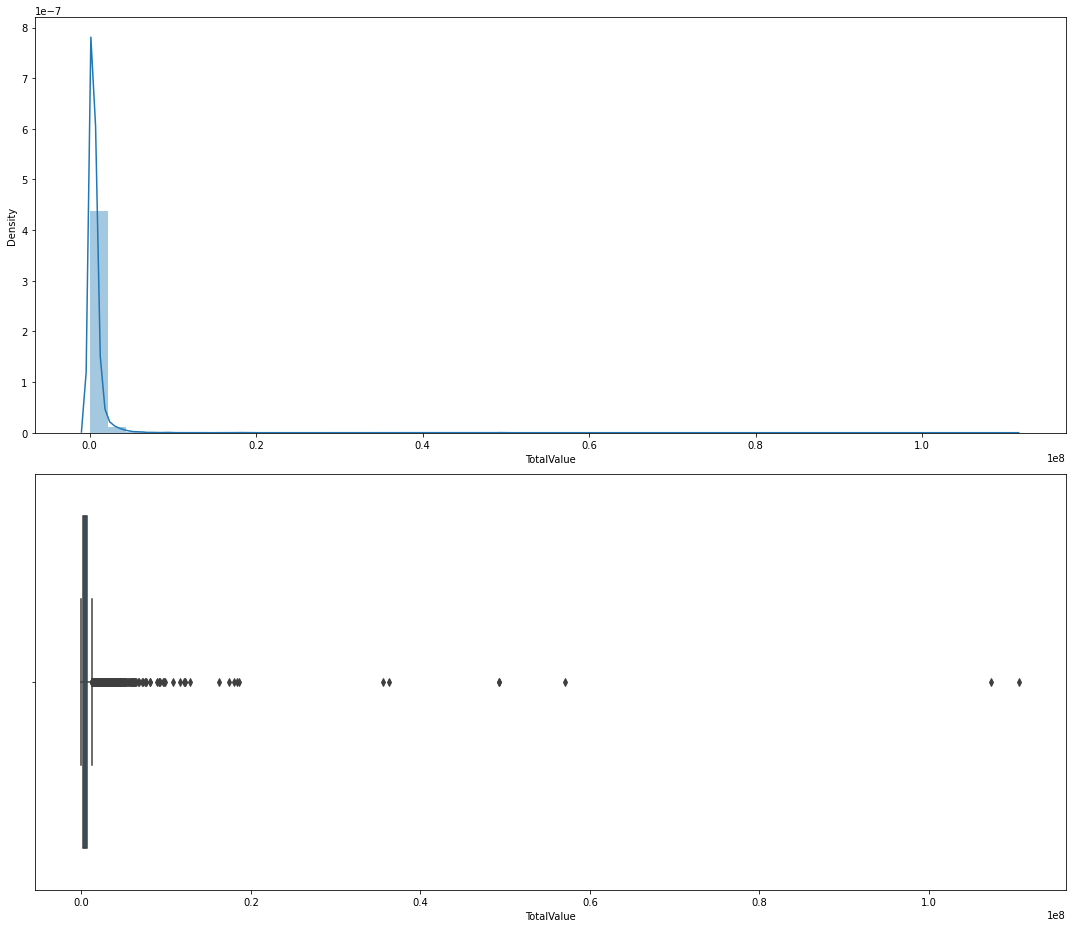

In [106]:
# checking nature of target variable and spotting outliers
import seaborn as sns

#plotting house values
fig = plt.figure(figsize=(15,13))
fig.add_subplot(2,1,1)
sns.distplot(df['TotalValue'])
fig.add_subplot(2,1,2)
sns.boxplot(df['TotalValue'])
plt.tight_layout()

In [107]:
# adding data to geo dataframe to aid with plottiung
#choosing relevant indices
gdf = gdf.iloc[df.index]
gdf['AdministrativeRegion_Cluster']=df['AdministrativeRegion_Cluster']
gdf['RecordingDate']=df['RecordingDate']

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


['TaxRateArea', 'PropertyType', 'PropertyUseCode', 'totBuildingDataLines', 'ZIPcode5', 'AdministrativeRegion_Cluster']


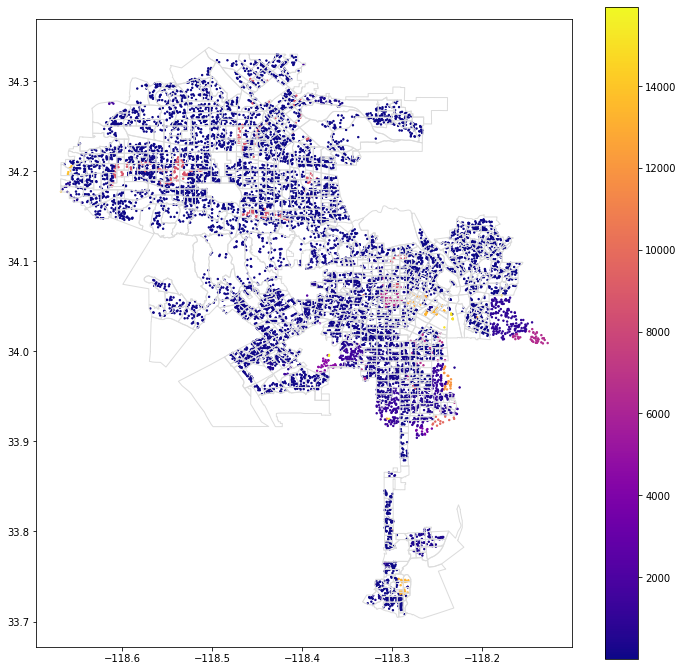

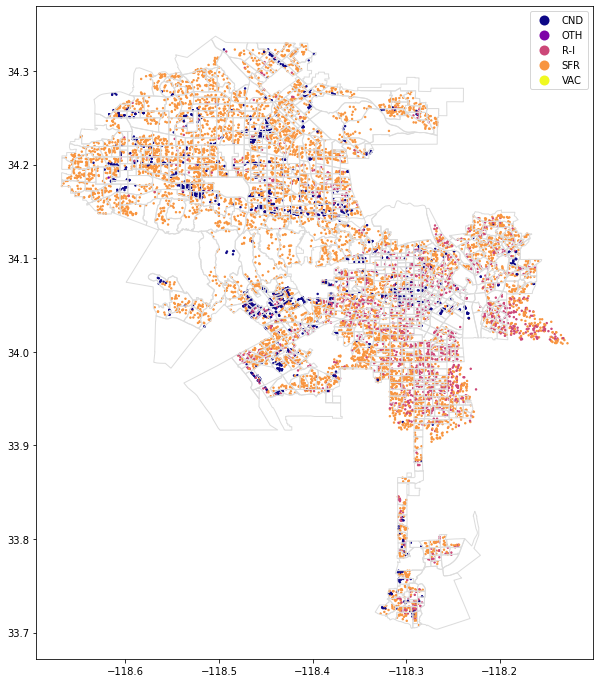

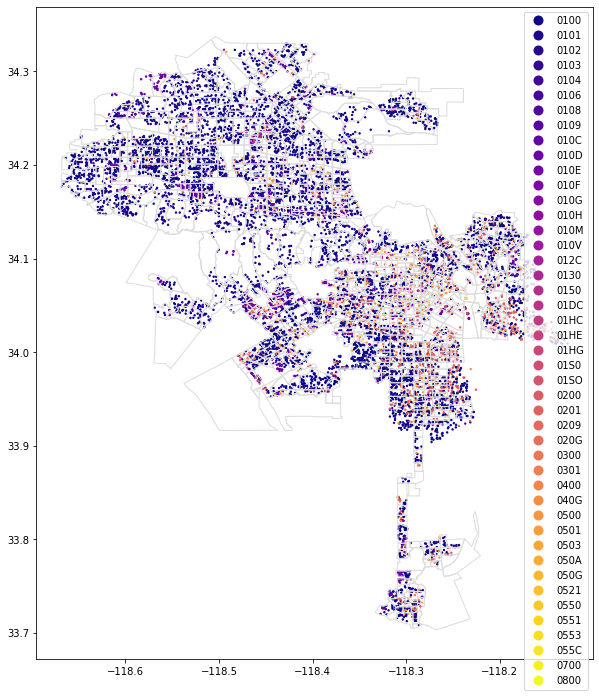

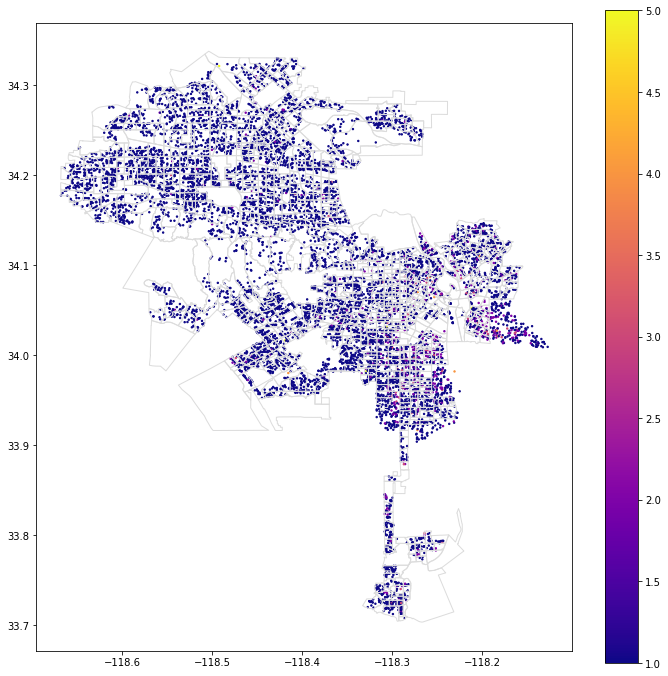

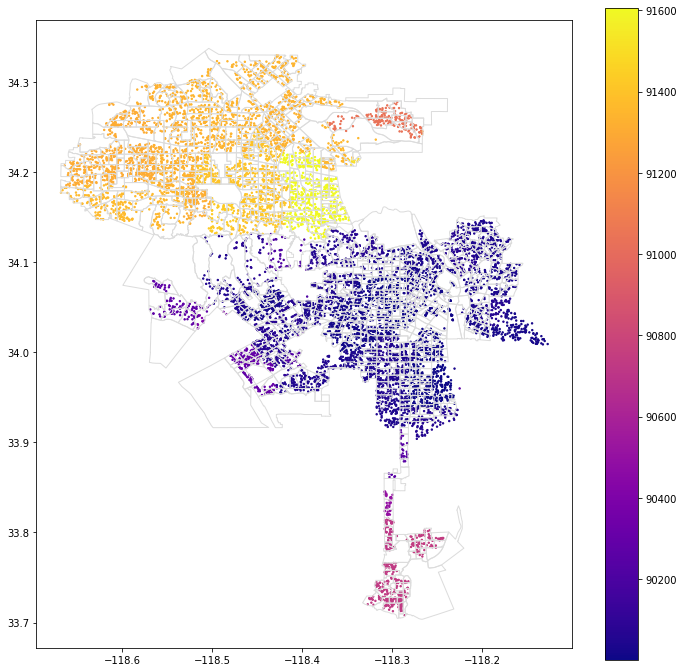

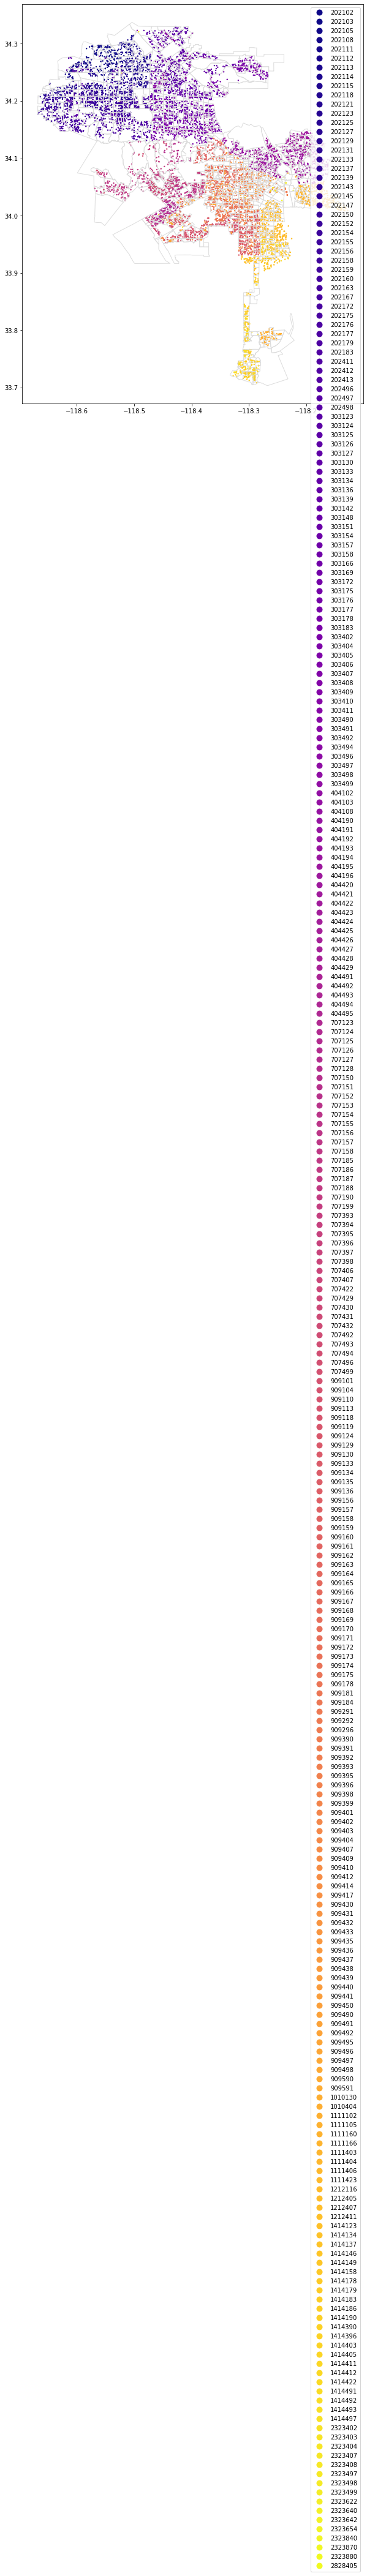

In [108]:
# plotting categorical variables with co-ordinates to observe spatial relationship
l = [column for column in df.columns if df[column].dtype in ['object']]
print(l)
for Column in l:
    ax = MAP.plot(figsize=(12,12), color='none', edgecolor='gainsboro', zorder=3)
    gdf.plot(column = Column,cmap='plasma',k=100,markersize=2,ax=ax,legend=True)

['YearBuilt', 'EffectiveYearBuilt', 'SQFTmain', 'Bedrooms', 'Bathrooms', 'Units', 'RecordingDate', 'TotalValue', 'CENTER_LAT', 'CENTER_LON', 'Total Housing Units', 'Total Population', 'Occupied Houses', 'Avg Household Size', 'Avg Household Size(Occupied)', 'Avg Household Size(Rented)', 'Total Household Size', 'Urban Housing', 'Population above 18', 'Median Age', 'Urban Pop']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

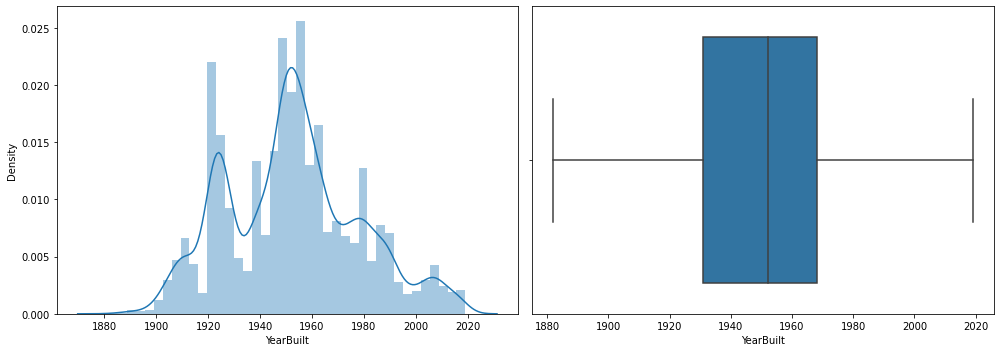

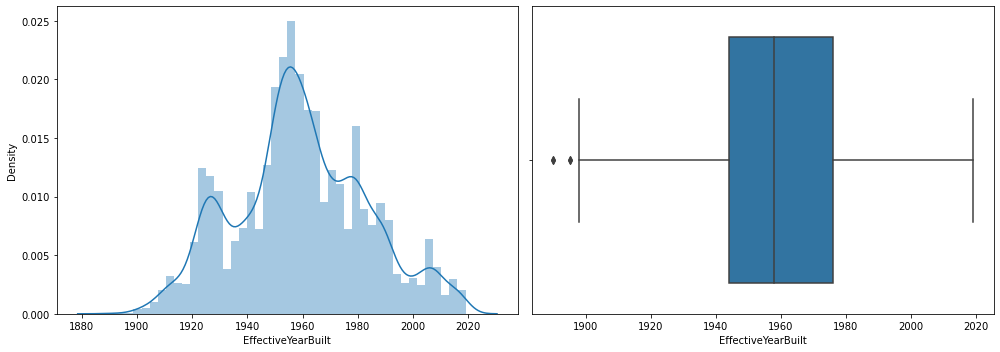

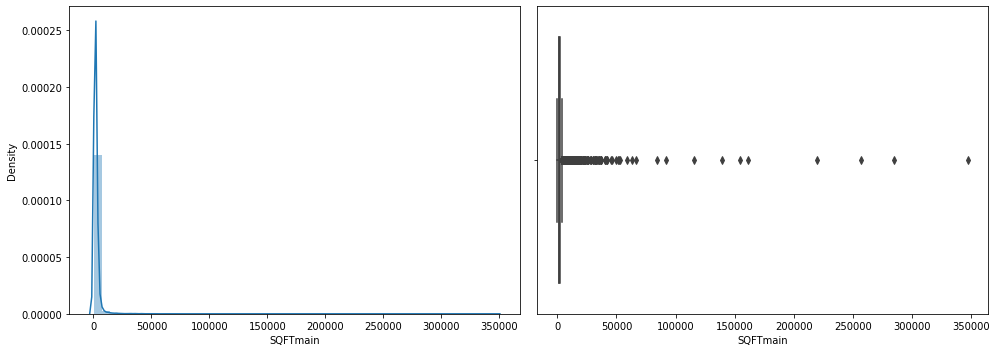

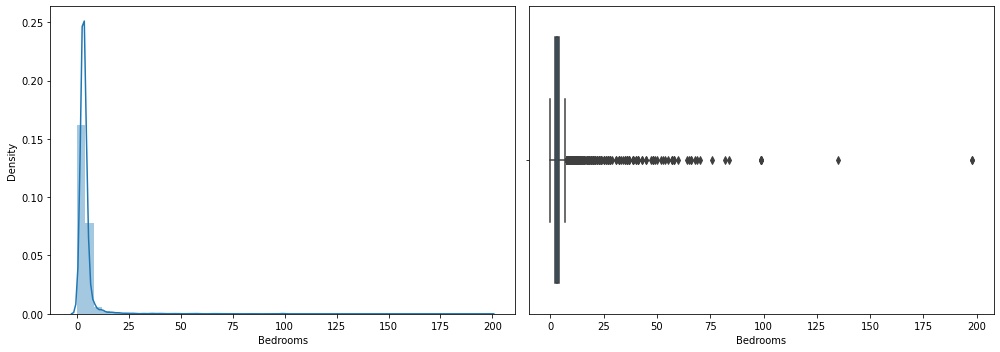

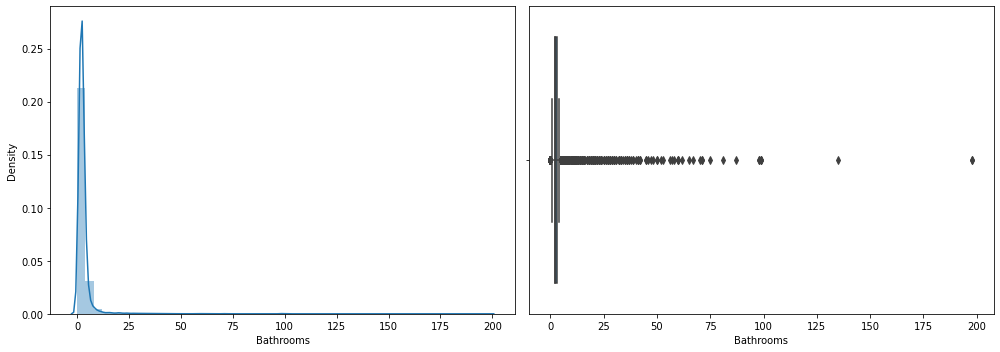

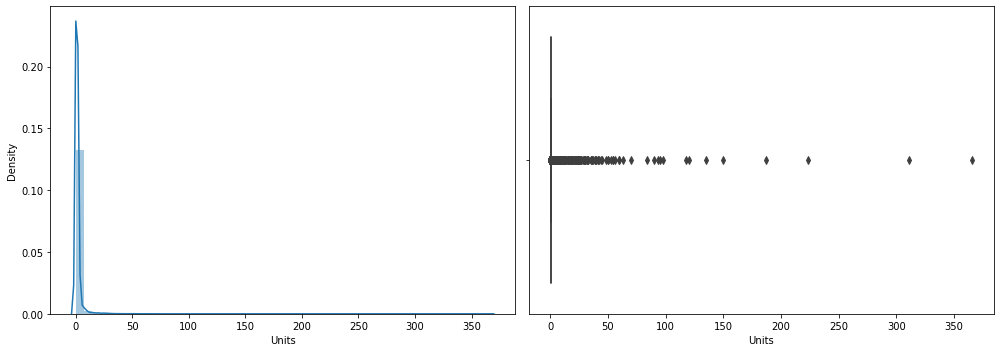

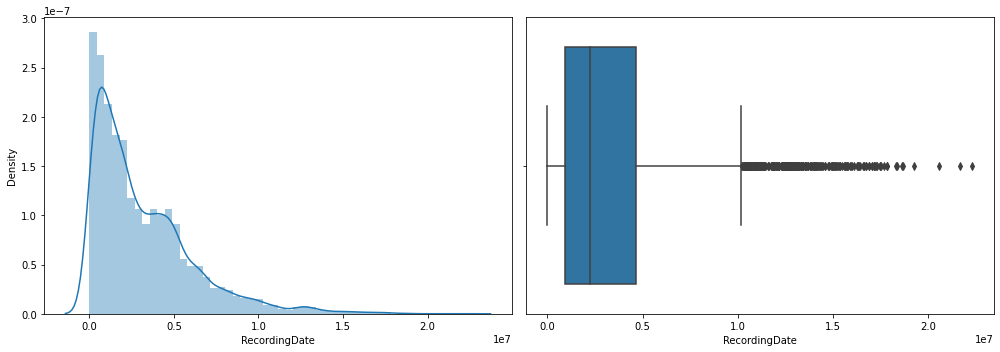

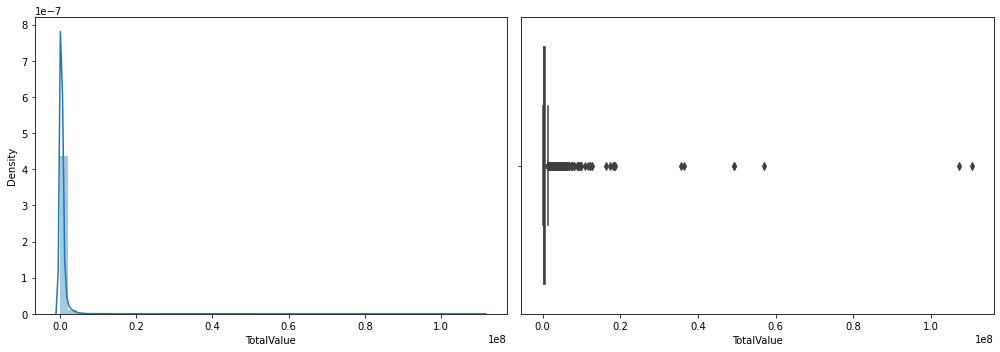

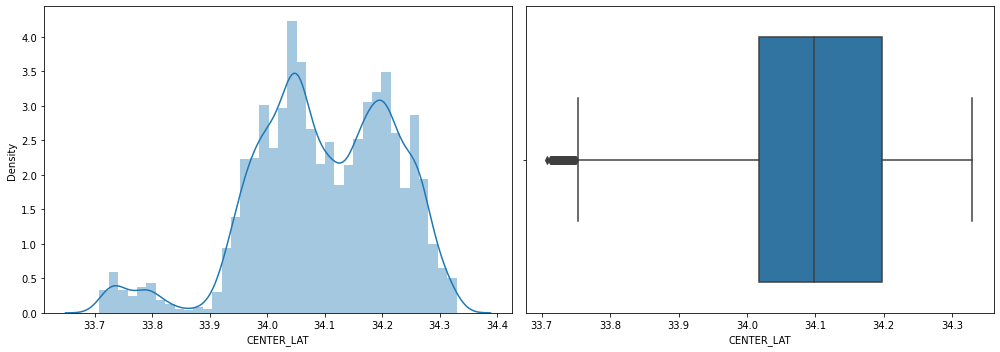

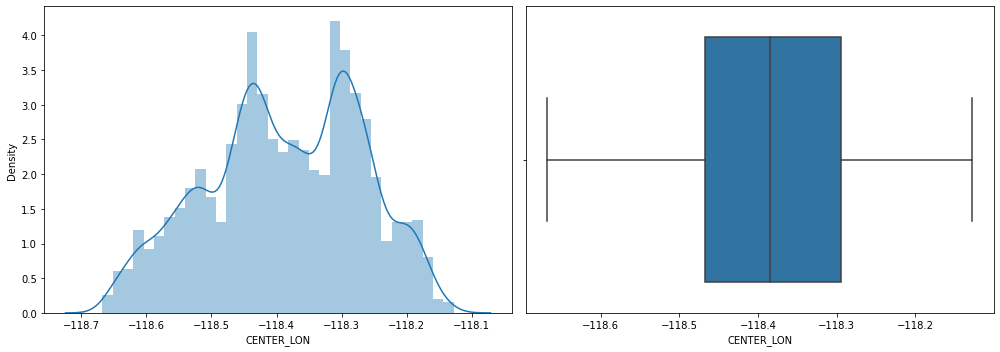

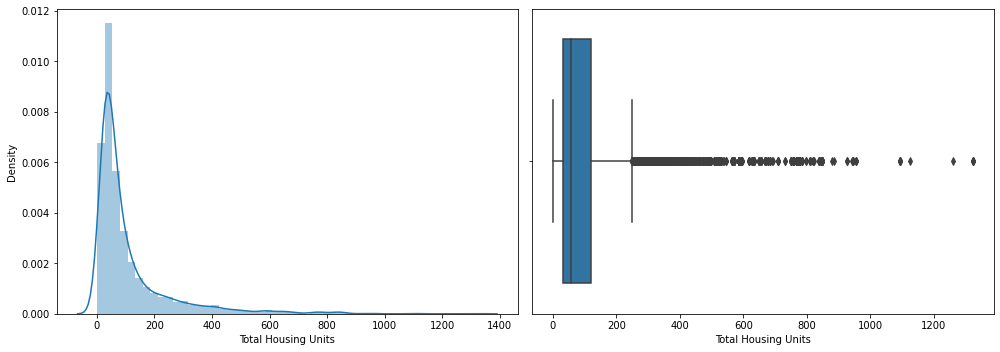

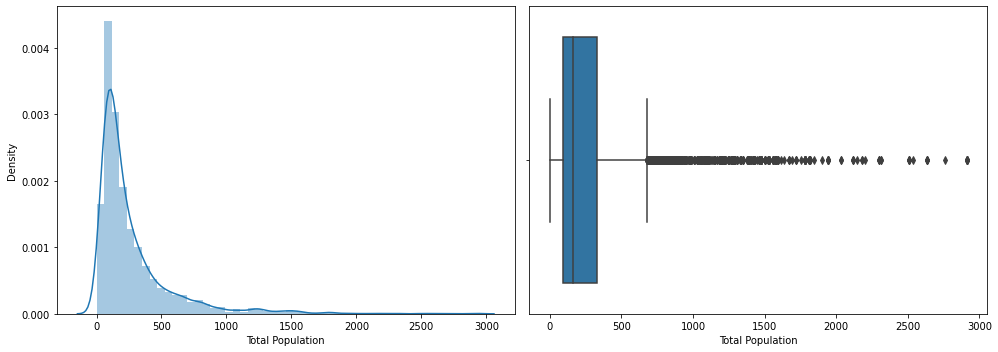

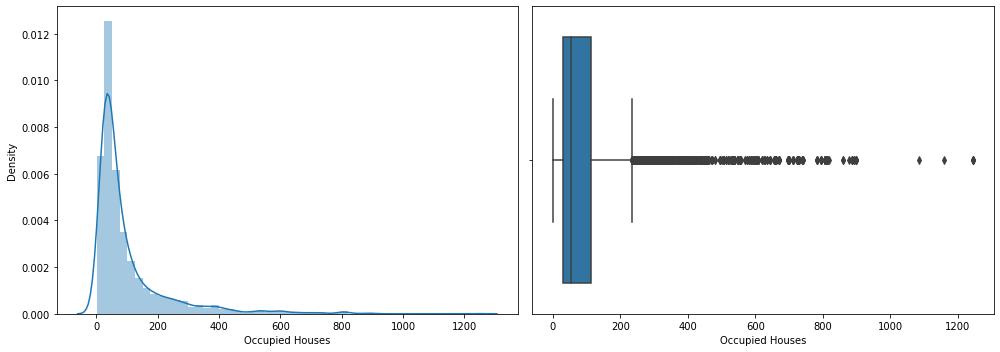

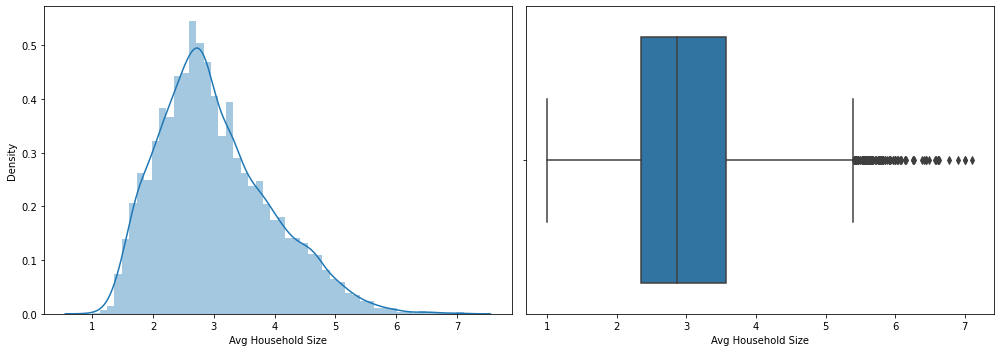

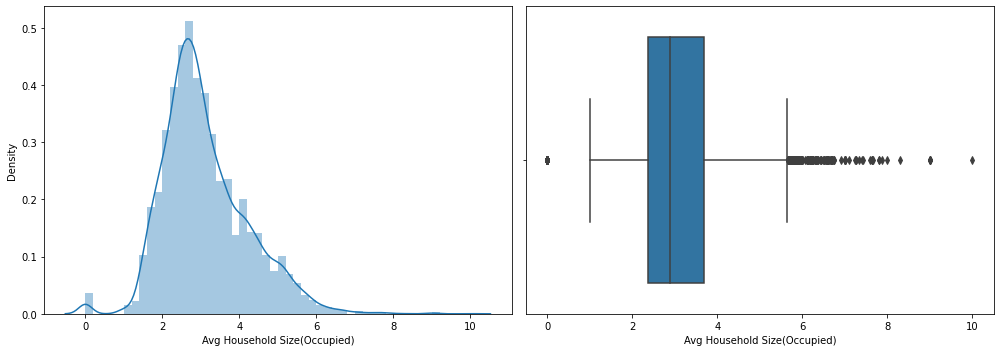

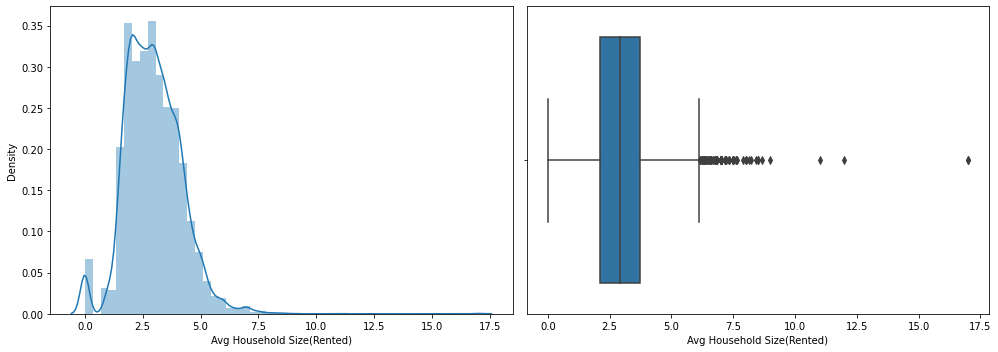

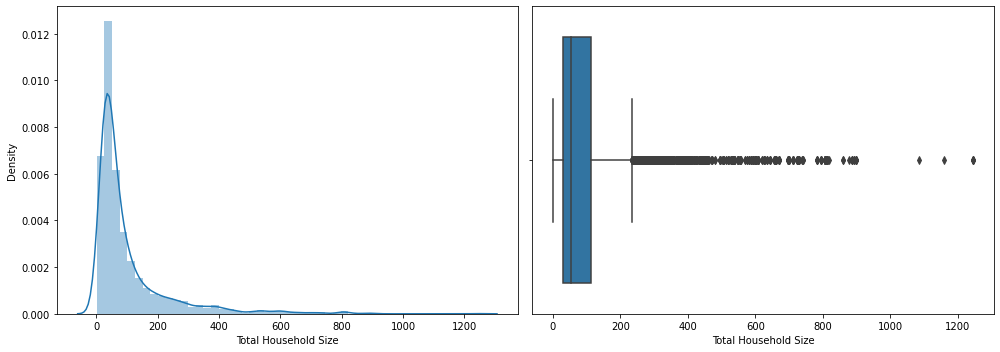

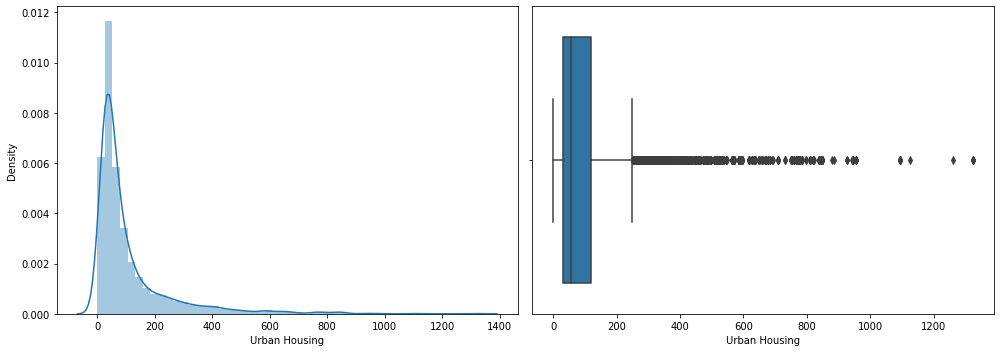

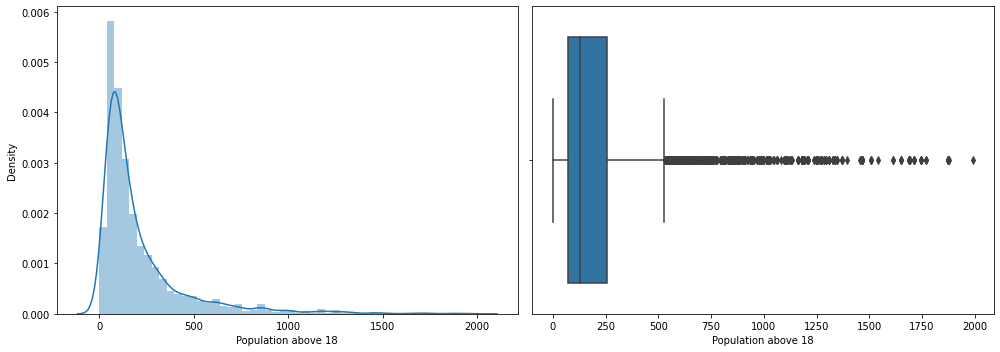

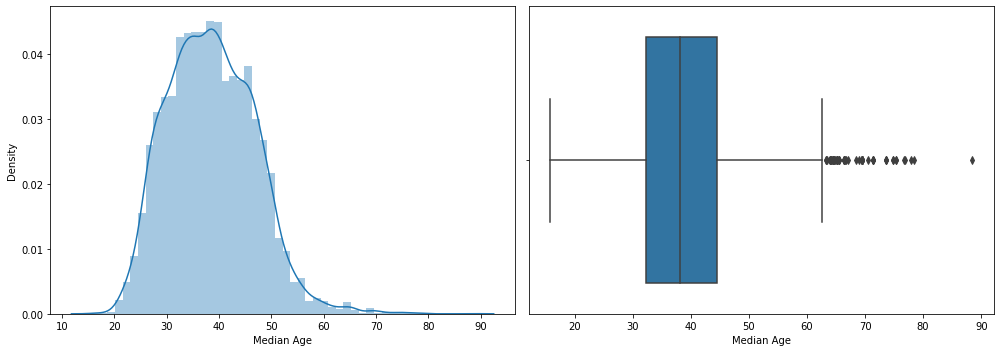

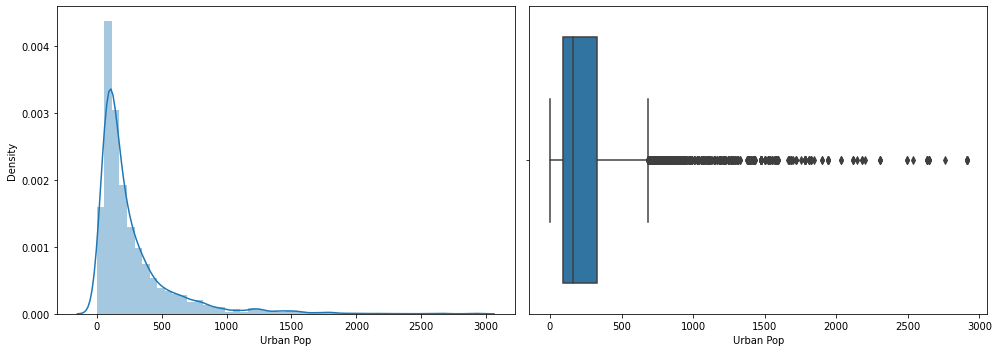

In [109]:
# observing distributions of numerical variables 
l = [column for column in df.columns if df[column].dtype in ['int64','float64']]
print(l)
for column in l:
    fig = plt.figure(figsize=(14,5))
    fig.add_subplot(1,2,1)
    sns.distplot(df[column])
    fig.add_subplot(1,2,2)
    sns.boxplot(df[column])
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


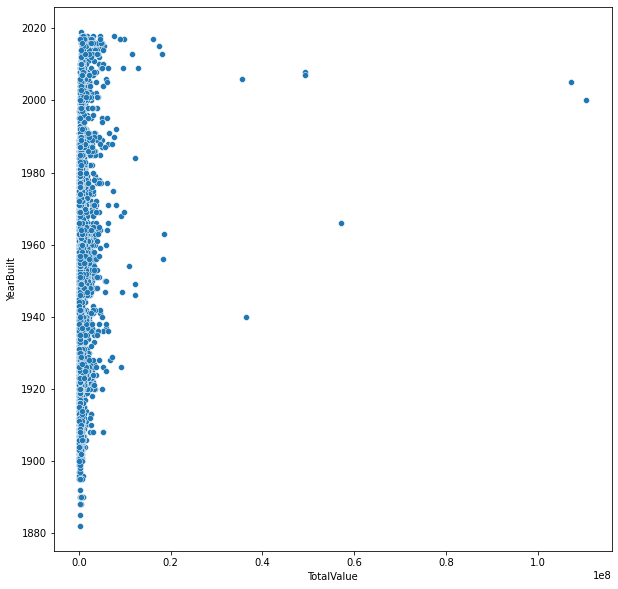

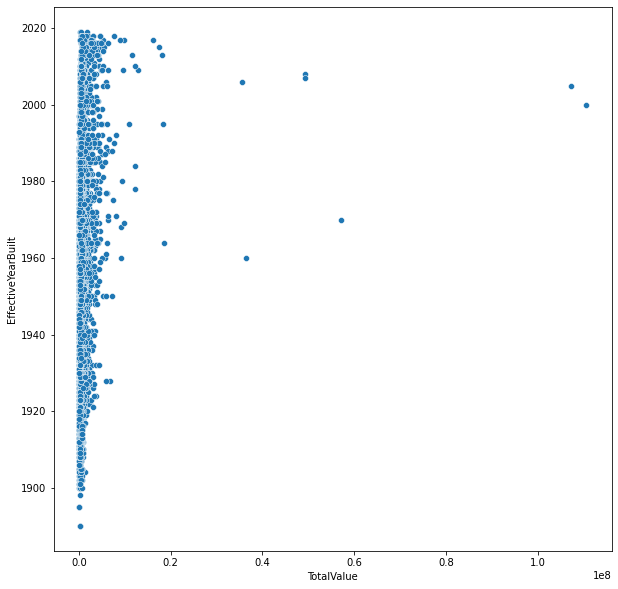

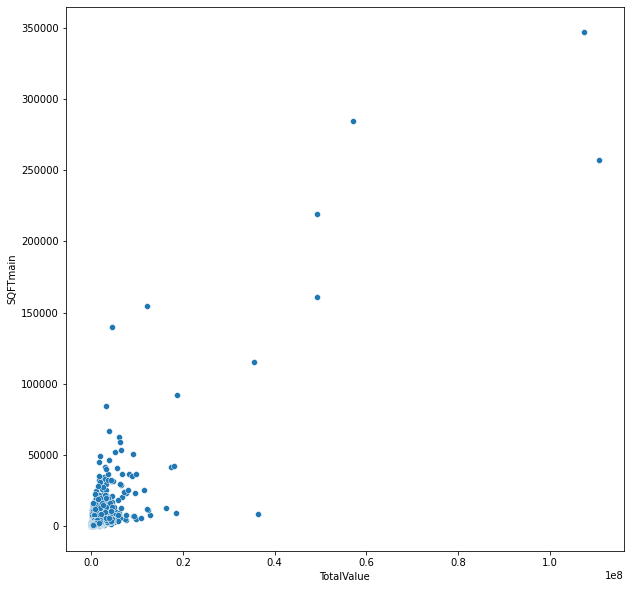

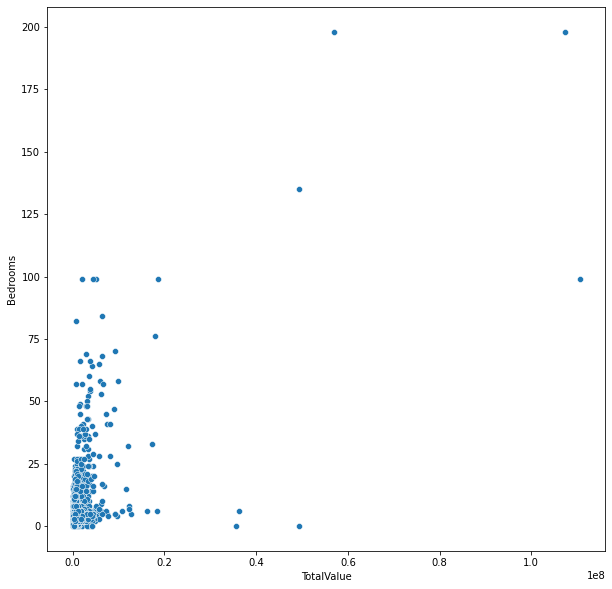

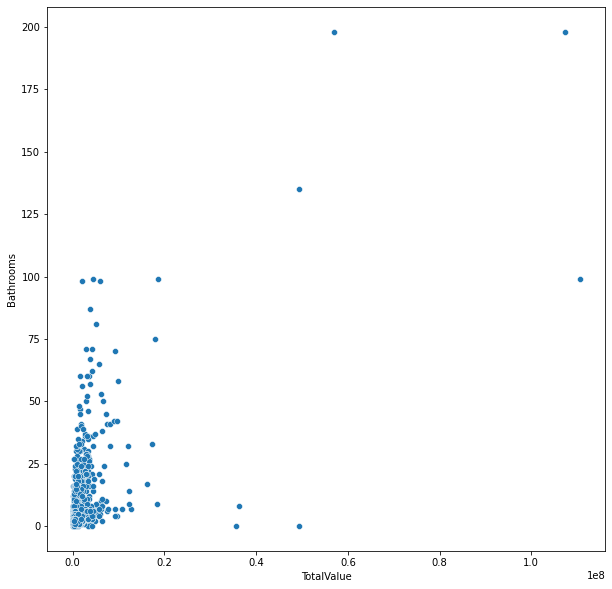

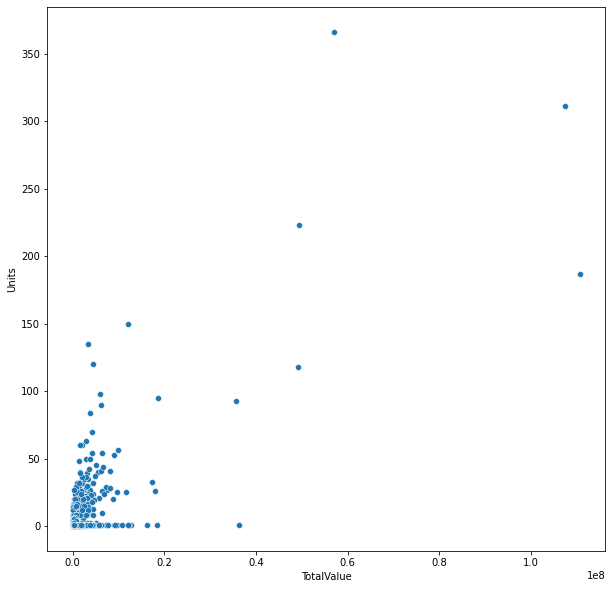

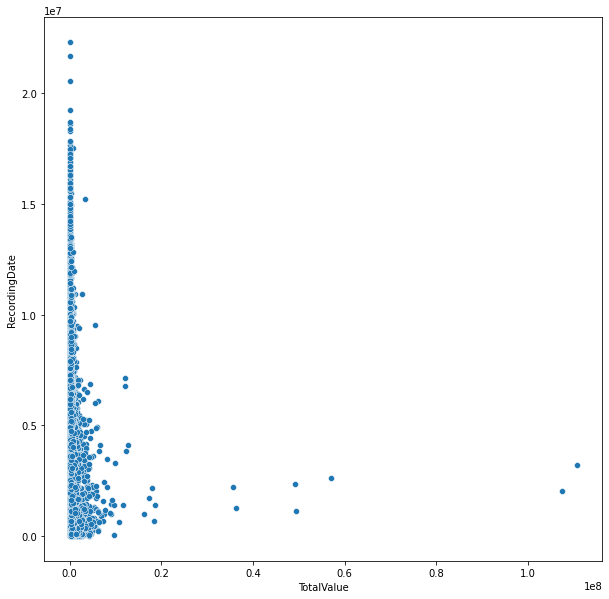

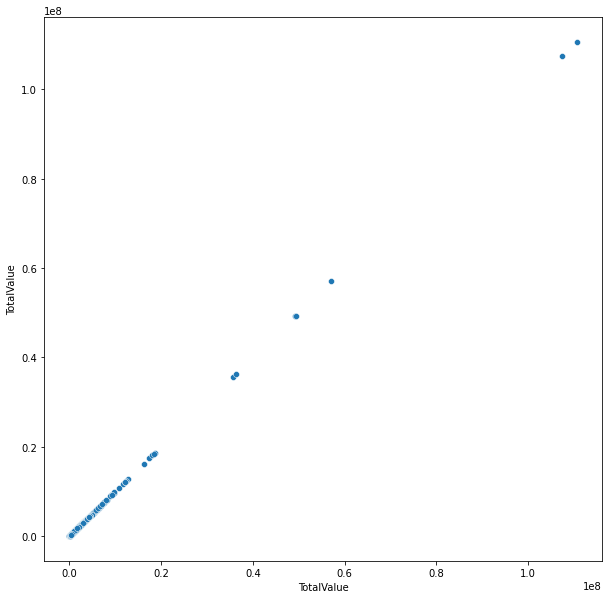

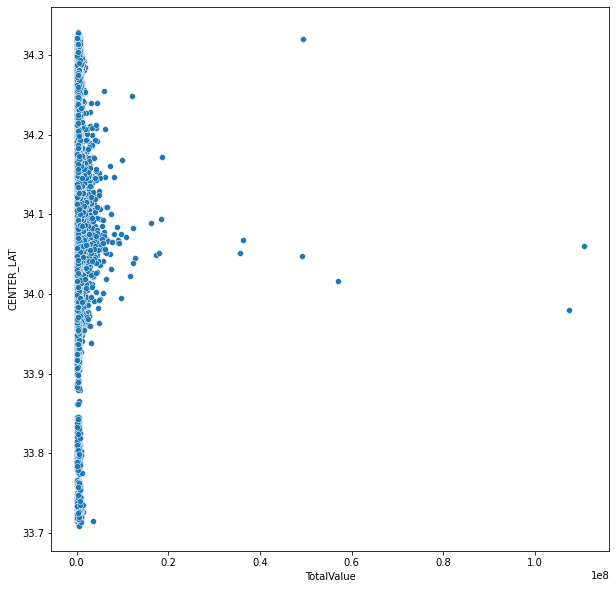

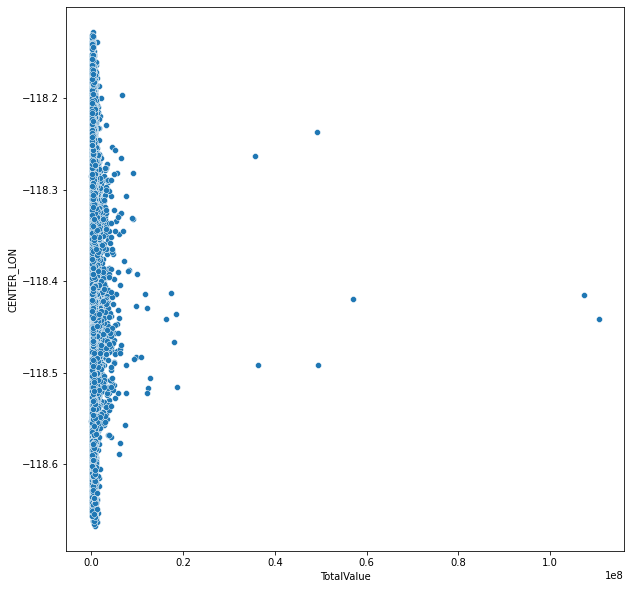

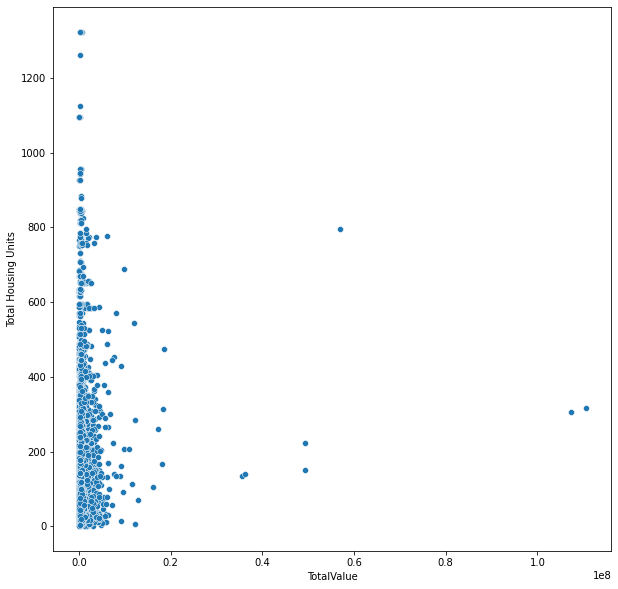

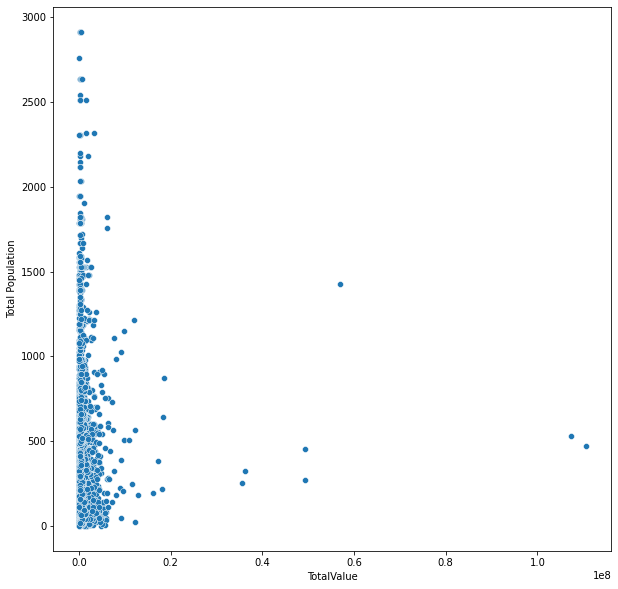

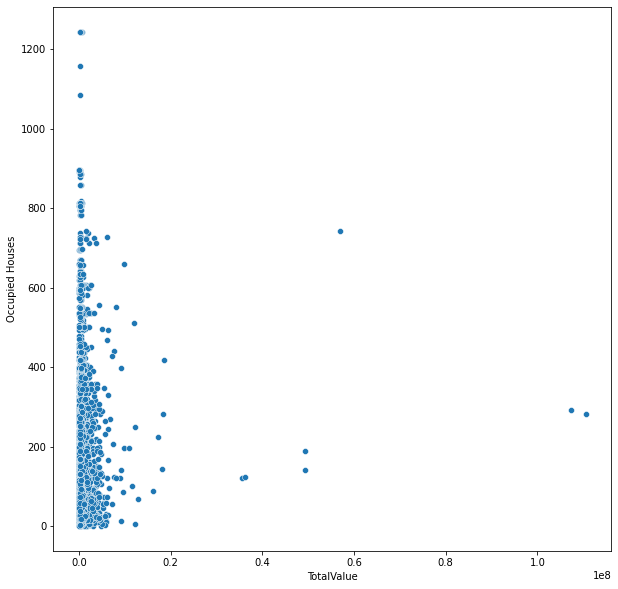

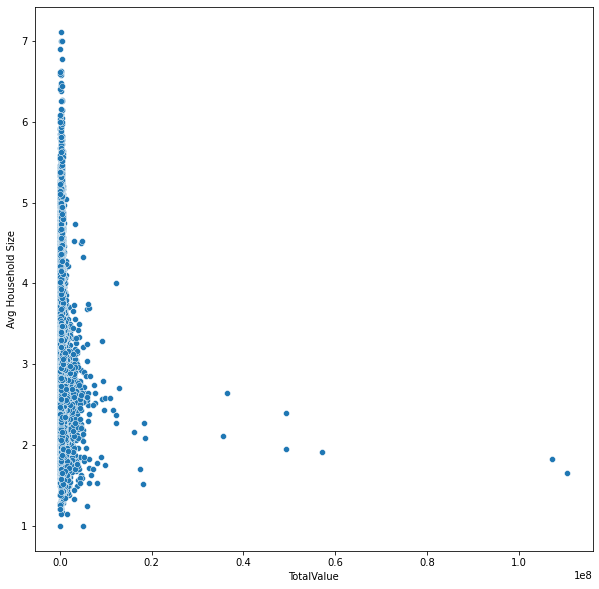

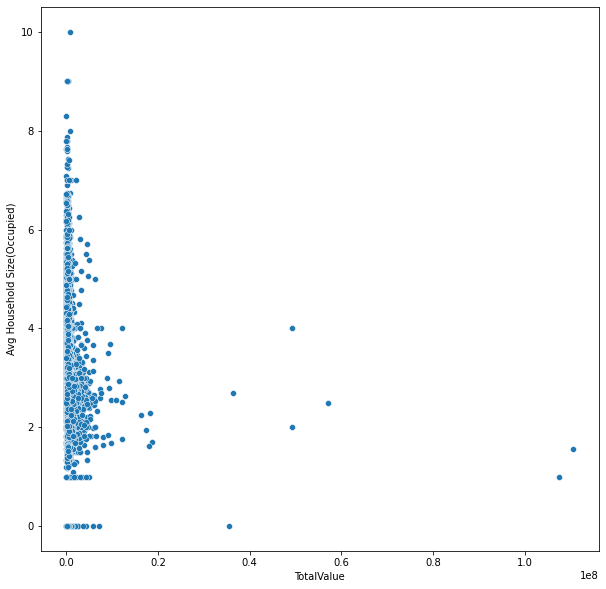

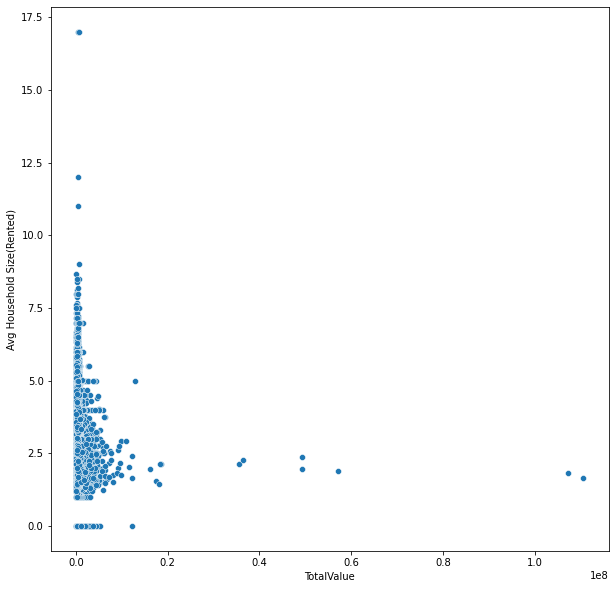

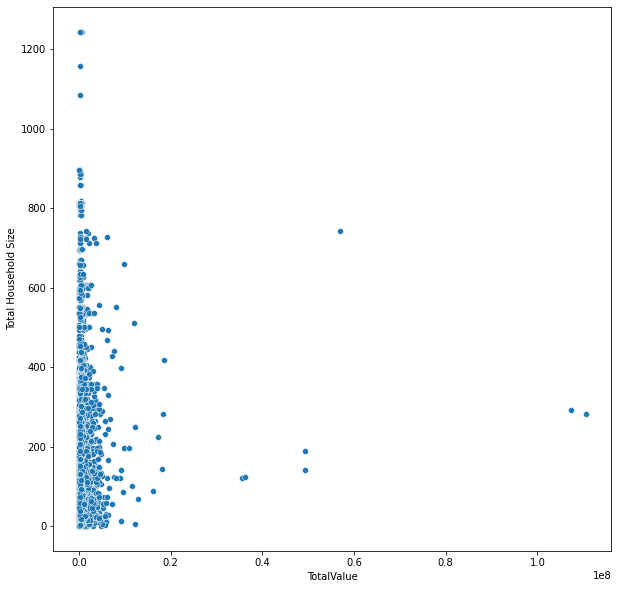

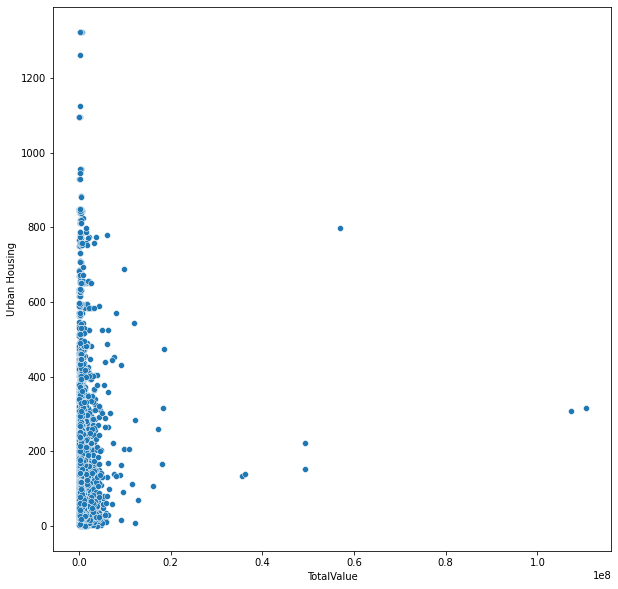

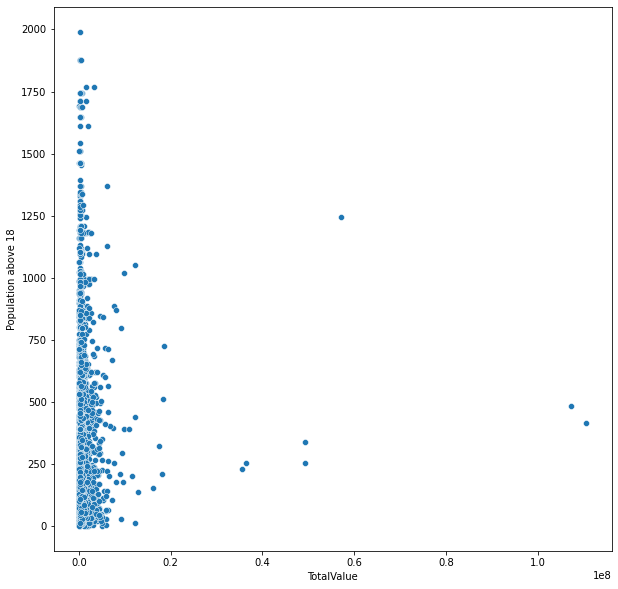

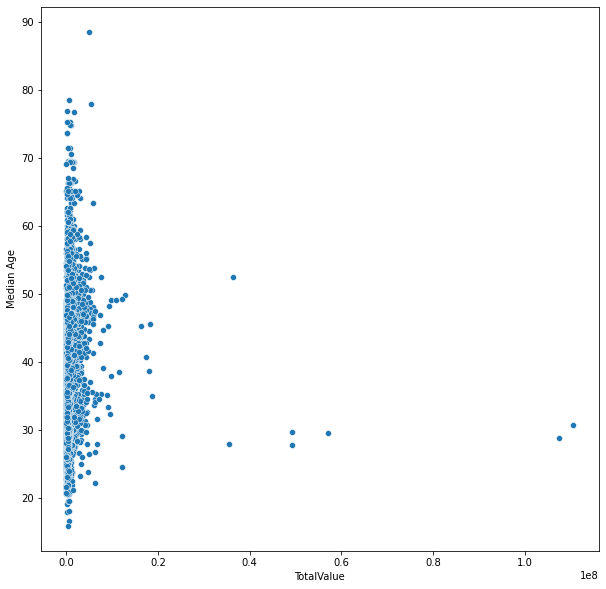

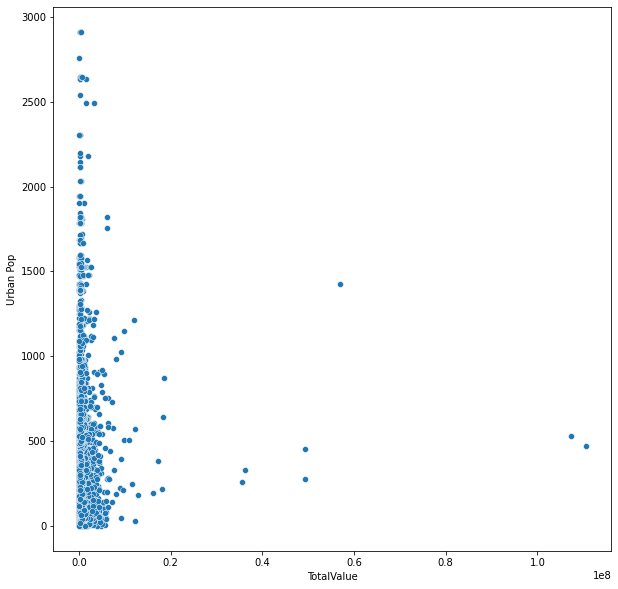

In [110]:
# Scatter plots of numerical variable with target variable to have intiution for correlation for those
for column in l:
    fig = plt.figure(figsize=(10,10))
    sns.scatterplot(x=df['TotalValue'],y=df[column])

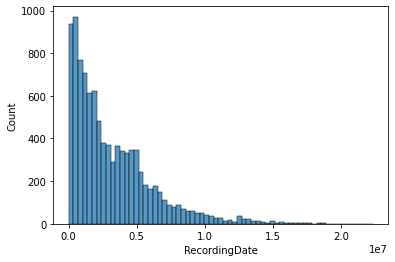

In [111]:
# observing recording date (difference between original recording date & 1 Jan 2109)
# Higher count of low recording date means most dates are near date of evaluation
sns.histplot(df['RecordingDate'])

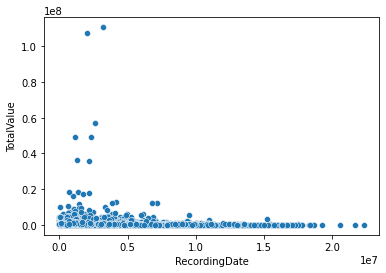

In [112]:
sns.scatterplot(x=df['RecordingDate'],y=df['TotalValue'])

In [113]:
#Reaaranging 
df['recordingDate']=pd.to_numeric(df["RecordingDate"])
df['totalValue']=df["TotalValue"]
df.drop(['TotalValue'],axis=1,inplace=True)


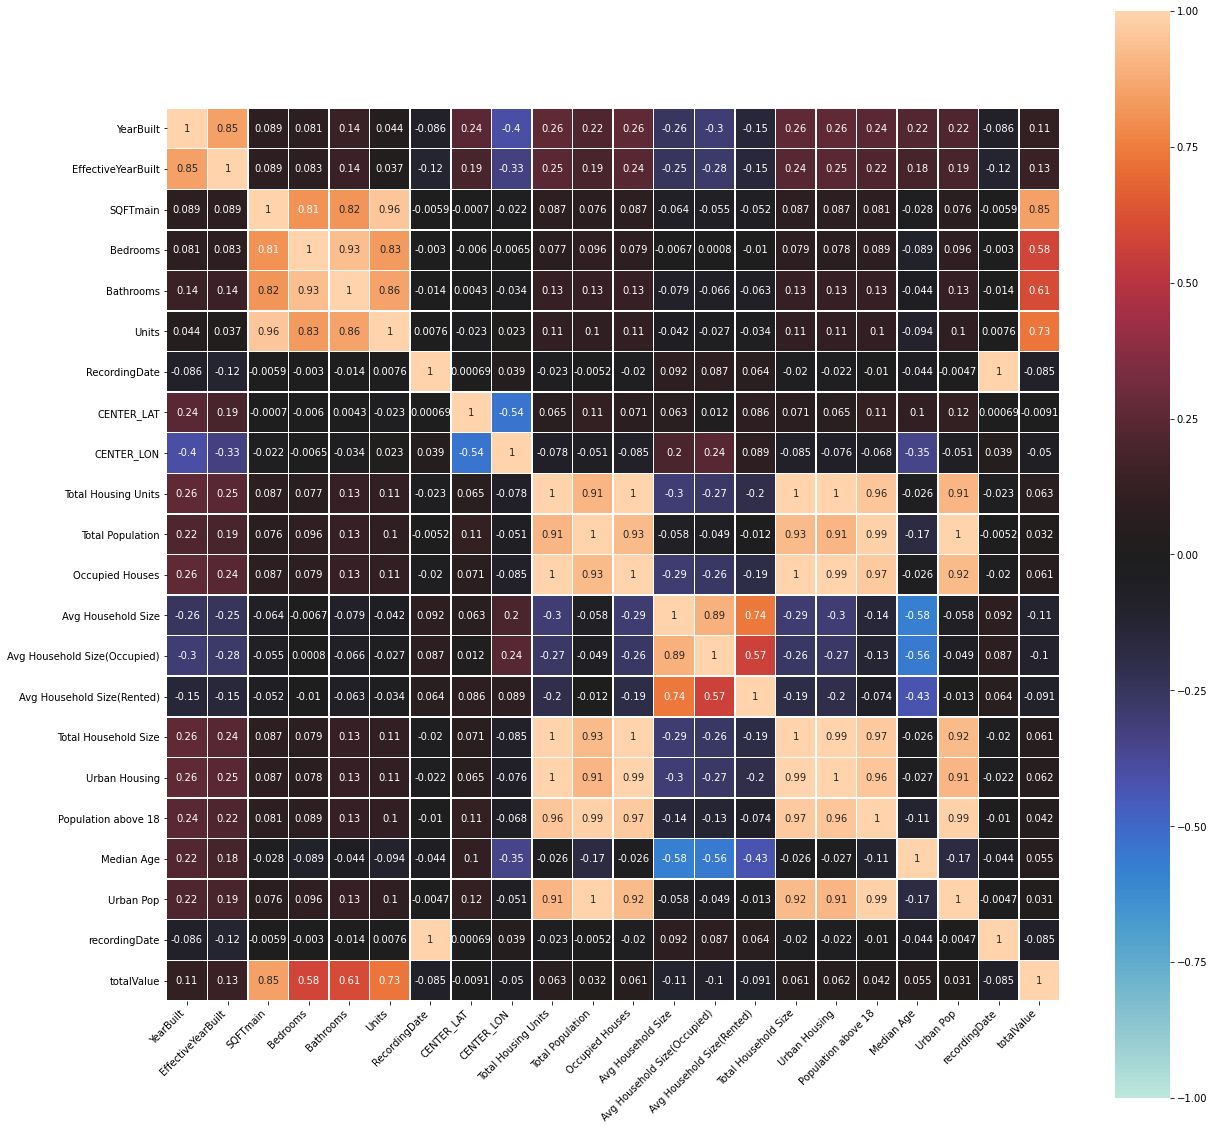

In [114]:
#plotting correlation matrix for numerical features
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,linewidths=.5,annot=True,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [115]:
#chi2 analysis for categorical feature
# extracting categorical features into separate df
# 
from sklearn.preprocessing import LabelEncoder
k = LabelEncoder()
l = [column for column in df.columns if df[column].dtype=='object']
q = df[l]
for column in q:
    q[column]=k.fit_transform(q[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [116]:
from sklearn.feature_selection import chi2
l1=[]
l2=[]
for column in q.columns:
    a1,a2 = chi2(q,q[column])
    l1.append(a1)
    l2.append(a2)


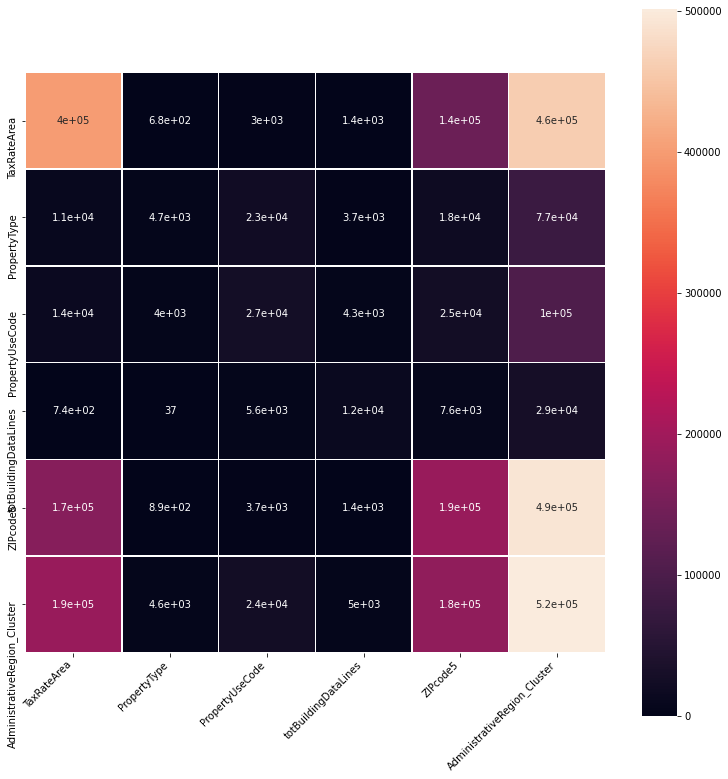

In [117]:
#plotting chi2 matrix
f, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(
    l1,
    vmin=0,robust=True,linewidths=.5,annot=True,
    square=True
)
ax.set_xticklabels(
    q.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    q.columns,horizontalalignment='right'
);


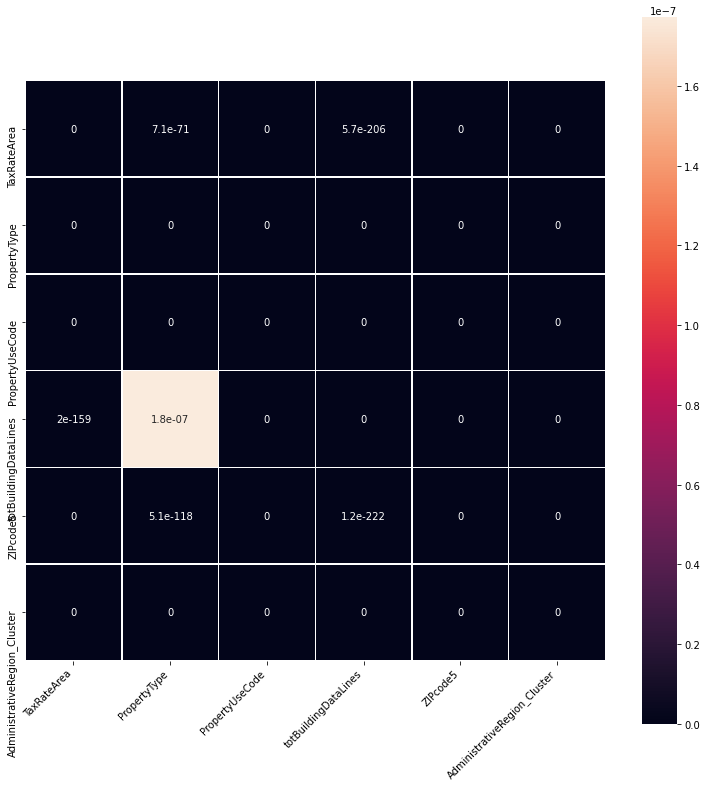

In [118]:
#plotting p-value matrix
f, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(
    l2,
    linewidths=.5,annot=True,
    square=True
)
ax.set_xticklabels(
    q.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    q.columns,horizontalalignment='right'
);


In [119]:
# All categorical features have p-value < 0.05 , all can be kept

In [120]:
#ANOVA test for figuring out relation between categorical variables and continious numerical target variable
from sklearn.feature_selection import f_regression
l = df['totalValue']
F,p_val=f_regression(q,l)
a = pd.DataFrame(list(zip(q.columns, p_val)),
               columns =['Name', 'p-val'])
a

Name         p-val
0                   TaxRateArea  5.905579e-01
1                  PropertyType  4.253196e-01
2               PropertyUseCode  1.245178e-34
3          totBuildingDataLines  3.982883e-21
4                      ZIPcode5  2.331986e-02
5  AdministrativeRegion_Cluster  3.849432e-04

In [121]:
# TaxRateArea, PropertyType having p-value > 0.05 hence can be dropped